In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Dell\.cache\kagglehub\datasets\harshitshankhdhar\imdb-dataset-of-top-1000-movies-and-tv-shows\versions\1


In [5]:
import pandas as pd

movies = pd.read_csv(f"{path}/imdb_top_1000.csv")
movies

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

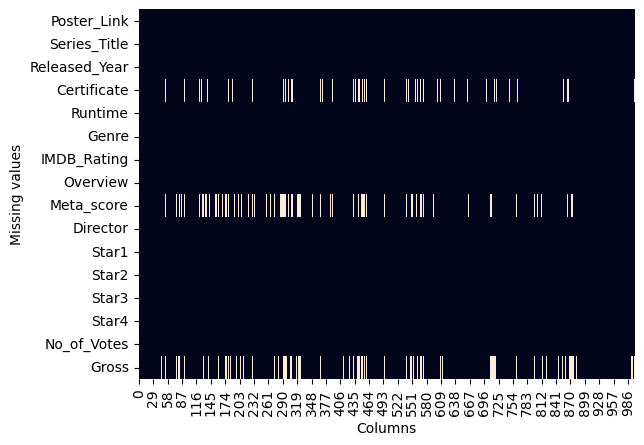

In [7]:
ax = plt.axes()
sns.heatmap(movies.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing values")

plt.show()

In [8]:
import numpy as np

# Add a column to indicate missing overviews
movies["missing_description"] = np.where(movies.Overview.isna(), 1, 0)

# Calculate the age of the movies
movies_without_pg = movies.Released_Year.replace('PG', np.nan)
movies["age_of_movies"] = 2024 - movies_without_pg.astype(float)


In [9]:
movies.Genre.value_counts().reset_index().sort_values("count", ascending=False)

,Genre,count
0,Drama,85
1,"Drama, Romance",37
2,"Comedy, Drama",35
3,"Comedy, Drama, Romance",31
4,"Action, Crime, Drama",30
...,...,...
152,"Action, Adventure, Family",1
151,"Biography, Drama, Romance",1
150,"Adventure, History, War",1
149,"Drama, History, Music",1


In [10]:
movies["words_in_overview"] = movies.Overview.str.split().str.len()

In [16]:
movies['Unique_id'] = range(1, len(movies) + 1)
movies['Tagged_description'] = movies[["Unique_id", "Overview"]].astype(str).agg(" ".join, axis=1)
movies

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,...,Star3,Star4,No_of_Votes,Gross,missing_description,age_of_movies,words_in_overview,Unique_id,tagged_description,Tagged_description
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,...,Bob Gunton,William Sadler,2343110,"28,341,469",0,30.0,19,1,1 Two imprisoned men bond over a number of yea...,1 Two imprisoned men bond over a number of yea...
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,...,James Caan,Diane Keaton,1620367,"134,966,411",0,52.0,16,2,2 An organized crime dynasty's aging patriarch...,2 An organized crime dynasty's aging patriarch...
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,...,Aaron Eckhart,Michael Caine,2303232,"534,858,444",0,16.0,33,3,3 When the menace known as the Joker wreaks ha...,3 When the menace known as the Joker wreaks ha...
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,...,Robert Duvall,Diane Keaton,1129952,"57,300,000",0,50.0,29,4,4 The early life and career of Vito Corleone i...,4 The early life and career of Vito Corleone i...
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,...,Martin Balsam,John Fiedler,689845,"4,360,000",0,67.0,18,5,5 A jury holdout attempts to prevent a miscarr...,5 A jury holdout attempts to prevent a miscarr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,...,Patricia Neal,Buddy Ebsen,166544,NaN,0,63.0,27,996,996 A young New York socialite becomes interes...,996 A young New York socialite becomes interes...
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,...,James Dean,Carroll Baker,34075,NaN,0,68.0,15,997,997 Sprawling epic covering the life of a Texa...,997 Sprawling epic covering the life of a Texa...
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,...,Deborah Kerr,Donna Reed,43374,"30,500,000",0,71.0,26,998,"998 In Hawaii in 1941, a private is cruelly pu...","998 In Hawaii in 1941, a private is cruelly pu..."
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,...,Walter Slezak,William Bendix,26471,NaN,0,80.0,30,999,999 Several survivors of a torpedoed merchant ...,999 Several survivors of a torpedoed merchant ...


In [17]:
(
    movies.drop(["missing_description","age_of_movies","words_in_overview","Gross","Meta_score","Certificate"], axis=1).to_csv("movies_cleaned.csv", index=False)
)

In [ ]:
movies_cleaned = pd.read_csv("data/movies_cleaned.csv")
movies_cleaned

,Poster_Link,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Unique_id,tagged_description,Tagged_description
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,1,1 Two imprisoned men bond over a number of yea...,1 Two imprisoned men bond over a number of yea...
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,2,2 An organized crime dynasty's aging patriarch...,2 An organized crime dynasty's aging patriarch...
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,3,3 When the menace known as the Joker wreaks ha...,3 When the menace known as the Joker wreaks ha...
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,4,4 The early life and career of Vito Corleone i...,4 The early life and career of Vito Corleone i...
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,5,5 A jury holdout attempts to prevent a miscarr...,5 A jury holdout attempts to prevent a miscarr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,996,996 A young New York socialite becomes interes...,996 A young New York socialite becomes interes...
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,997,997 Sprawling epic covering the life of a Texa...,997 Sprawling epic covering the life of a Texa...
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,998,"998 In Hawaii in 1941, a private is cruelly pu...","998 In Hawaii in 1941, a private is cruelly pu..."
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,999,999 Several survivors of a torpedoed merchant ...,999 Several survivors of a torpedoed merchant ...
